# Week 1

In [86]:
import networkx as nx

### Undirected network

###### # Example 1

In [87]:
g = nx.Graph()

In [88]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [89]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [90]:
g['A']

AtlasView({'B': {}})

### Directed network

###### # Example 2

In [91]:
g = nx.DiGraph()

In [92]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [93]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), OutEdgeView([('A', 'B'), ('B', 'C')]))

In [94]:
g['A']

AtlasView({'B': {}})

### Weighted network

###### # Example 3

In [95]:
g = nx.Graph()

In [96]:
g.add_edge('A', 'B', weight=6)
g.add_edge('B', 'C', weight=13)

In [97]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [98]:
g['A']

AtlasView({'B': {'weight': 6}})

### Signed network 

###### # Example 4

In [99]:
g = nx.Graph()

In [100]:
g.add_edge('A', 'B', sign='+')
g.add_edge('B', 'C', sign='-')

In [101]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [102]:
g['A']

AtlasView({'B': {'sign': '+'}})

### Multigraph

###### # Example 5

In [103]:
g = nx.MultiGraph()

In [104]:
g.add_edge('A', 'B', relation='friend')
g.add_edge('A', 'B', relation='neighbor')

1

In [105]:
g.node(), g.edges()

(NodeView(('A', 'B')), MultiEdgeDataView([('A', 'B'), ('A', 'B')]))

In [106]:
g['A']

AdjacencyView({'B': {0: {'relation': 'friend'}, 1: {'relation': 'neighbor'}}})

### Summary

![summary](./media/graphs.png)

###### # Example 6

In [107]:
g = nx.Graph()

In [108]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [109]:
g.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [110]:
g.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

In [111]:
g.edges(data='relation')

EdgeDataView([('A', 'B', 'family'), ('B', 'C', 'friend')])

In [112]:
g.edges(data='weight')

EdgeDataView([('A', 'B', 6), ('B', 'C', 13)])

In [113]:
g.edges(data='sign')

EdgeDataView([('A', 'B', '+'), ('B', 'C', '-')])

In [114]:
g['A']

AtlasView({'B': {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [115]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [116]:
g['A']['B']['relation']

'family'

In [117]:
if (g['B']['A'] == g['A']['B']): print('OK: This is an UNdirected graph')

OK: This is an UNdirected graph


###### # Example 7

In [118]:
g = nx.DiGraph()

In [119]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [120]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [121]:
try:
    g['B']['A'] == g['A']['B']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


###### # Example 8

In [122]:
g = nx.MultiDiGraph()

In [123]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

0

In [124]:
g['A']['B']

AtlasView({0: {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [125]:
g['A']['B'][0]

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [126]:
g['A']['B'][0]['relation']

'family'

In [127]:
try:
    g['B']['A']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


In [128]:
g.nodes()

NodeView(('A', 'B', 'C'))

In [129]:
g.edges(data=True)

OutMultiEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

### Bipartite Graph

In [130]:
from networkx.algorithms import bipartite

###### # Example 9

In [131]:
b = nx.Graph()

In [132]:
left = 'A B C D E'.split()
right = (1, 2, 3, 4)

In [133]:
b.add_nodes_from(left, bipartite=0)

In [134]:
b.add_nodes_from(right, bipartite=1)

In [135]:
b.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 1, 2, 3, 4))

In [136]:
b.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [137]:
b.edges()

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

- Checking for bipartite graph:

In [138]:
bipartite.is_bipartite(b)

True

In [139]:
b.add_edge('A', 'B')

In [140]:
bipartite.is_bipartite(b)

False

In [141]:
b.remove_edge('A', 'B')

In [142]:
bipartite.is_bipartite(b)

True

- Check if set is one bipartition:

In [143]:
bipartite.is_bipartite_node_set(b, left)

True

In [144]:
bipartite.is_bipartite_node_set(b, right)

True

In [145]:
bipartite.is_bipartite_node_set(b, (1, 2, 3))

False

In [146]:
# FIXME
bipartite.sets(b)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

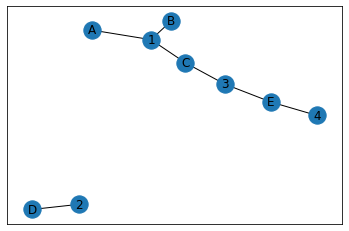

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw_networkx(b)

### Projected graphs

###### # Example 10

In [150]:
# TODO
# bipartite.projected_graph(B,X)

###### # Example 11

In [151]:
# TODO
# bipartite.wighted_projected_graph(B,X)